In [41]:
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")
# this is the convenience function
from autokoopman import auto_koopman

In [52]:
import autokoopman.benchmark.fhn as fhn
dt = 0.1
tspan = 10.0
fhn = fhn.FitzHughNagumo()
training_data = fhn.solve_ivps(
    initial_states=np.random.uniform(low=-2.5, high=2.5, size=(200, 2)),
    tspan=[0.0, dt*49],
    sampling_period=dt
)

test_ivs = np.random.uniform(low=-2.0, high=2.0, size=(20, 2))
test_data = fhn.solve_ivps(
    initial_states=test_ivs,
    tspan=[0.0, dt*5],
    sampling_period=dt
)

In [51]:
import autokoopman.estimator.deepkoopman as dk

koop = dk.DeepKoopman(
    state_dim=len(training_data.state_names), 
    input_dim=0, 
    hidden_dim=50, 
    max_iter=6000,
    lr=1e-3, 
    hidden_enc_dim=256,
    num_hidden_layers=2,  
    metric_loss_weight=1e-2, 
    pred_loss_weight=1e-2, 
    validation_data=test_data
)

DeepKoopman is using torch device 'cuda:0'


In [44]:
# do training
koop.fit(training_data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6000/6000 [06:21<00:00, 15.72it/s]


In [55]:
plt.figure(figsize=(10, 8))
plt.plot(koop.loss_hist['validation_lin_loss'], label="linearity loss")
plt.plot(koop.loss_hist['validation_pred_loss'], label="prediction loss")
plt.plot(koop.loss_hist['validation_total_loss'], label="total loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.title("Deep Learning Loss")
plt.legend()
plt.grid()
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 1000x800 with 0 Axes>

In [47]:
# solve for test trajectories
fit_data = koop.model.solve_ivps(test_ivs, tspan=[0.0, dt*5], sampling_period=dt)

Text(0.5, 1.0, 'FHN Deep Koopman')

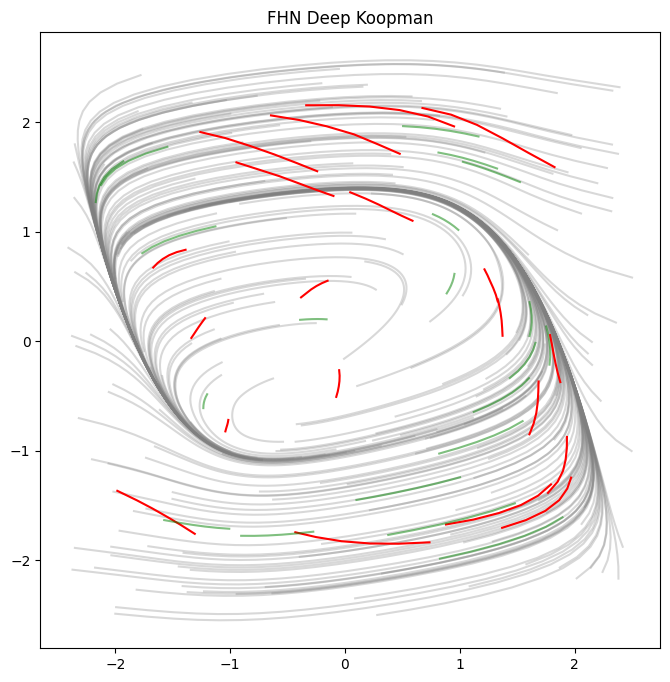

In [54]:
plt.figure(figsize=(8, 8))
for t in training_data:
    plt.plot(*t.states.T, 'gray', alpha=0.3)
for t, tt in zip(fit_data, test_data):
    plt.plot(*t.states.T, 'r')
    plt.plot(*tt.states.T, 'g', alpha=0.5)
    
plt.title("FHN Deep Koopman")